# Libraries

In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np 
import os

2023-12-13 13:05:03.813503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 13:05:03.813546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 13:05:03.814557: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 13:05:03.821075: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 13:05:04.757088: W tensorflow/compiler/tf2

In [2]:
if tf.test.gpu_device_name():
    print("GPU found, using GPU")
else:
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    print("No GPU found, using CPU")

print(tf.__version__)

No GPU found, using CPU
2.15.0


In [3]:
#physical_devices = tf.config.list_physical_devices("GPU")
#if len(physical_devices)>0:
#    tf.config.experimental.set_memory_growth(physical_devices[0],True)

# Simple model MNIST

## Data

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
print("train :", x_train.shape,y_train.shape)
print("test  :", x_test.shape,y_test.shape)
print("range :",x_train[1].max())
print("type  :",type(x_train))

train : (60000, 28, 28) (60000,)
test  : (10000, 28, 28) (10000,)
range : 255
type  : <class 'numpy.ndarray'>


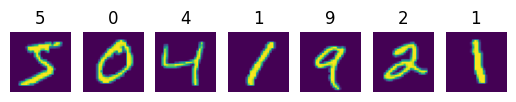

In [6]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    ax[i].axis('off')

In [7]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

## Simple DNN

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(optimizer="sgd", #optimizer=keras.optimizers.SGD(momentum=0.5)
              loss="categorical_crossentropy",
              metrics=["acc"])

In [47]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
print(y_train[100])
print(y_train_onehot[100,:])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [49]:
hist = model.fit(x_train, y_train_onehot,
                 validation_data = (x_test,y_test_onehot),
                 epochs = 3,
                 batch_size=128)

Epoch 1/3
469/469 [==============================] - 1s 2ms/step - loss: 0.4868 - acc: 0.8754 - val_loss: 0.4500 - val_acc: 0.8892
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 0.4609 - acc: 0.8807 - val_loss: 0.4285 - val_acc: 0.8928
Epoch 3/3
469/469 [==============================] - 1s 2ms/step - loss: 0.4418 - acc: 0.8845 - val_loss: 0.4122 - val_acc: 0.8941


In [50]:
128*469

60032

In [51]:
hist.history

{'loss': [0.4868108034133911, 0.4608894884586334, 0.4417719542980194],
 'acc': [0.8754333257675171, 0.8806666731834412, 0.8845000267028809],
 'val_loss': [0.450012743473053, 0.42848941683769226, 0.41217607259750366],
 'val_acc': [0.88919997215271, 0.892799973487854, 0.89410001039505]}

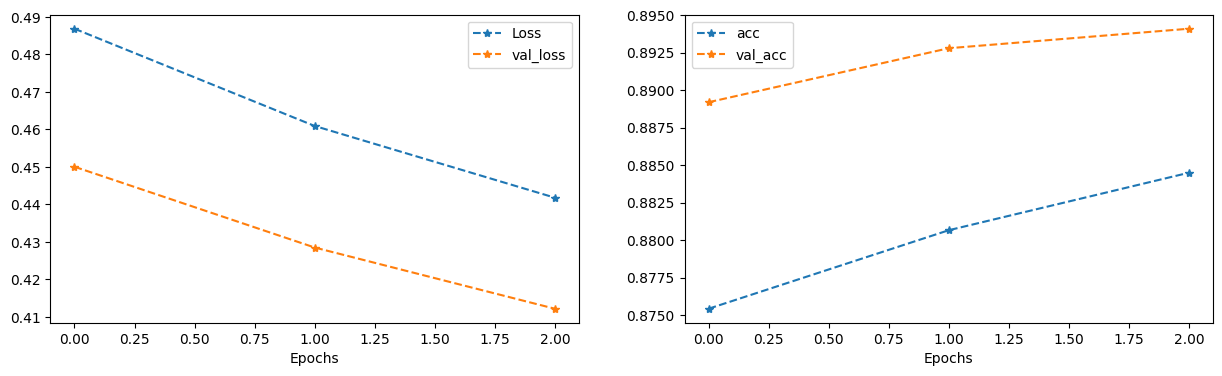

In [73]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,4))

axs[0].plot(hist.history["loss"],"--*",label="Loss")
axs[0].plot(hist.history["val_loss"],"--*",label="val_loss")
axs[0].set_xlabel("Epochs")
axs[0].legend()

axs[1].plot(hist.history["acc"],"--*",label="acc")
axs[1].plot(hist.history["val_acc"],"--*",label="val_acc")
axs[1].set_xlabel("Epochs")
axs[1].legend()

plt.show()

In [72]:
print("value     : ",y_test[1])
print("prediction: ",model.predict(x_test[1,:,:].reshape(1,28,28)).argmax())

value     :  2
1/1 [==============================] - 0s 15ms/step
prediction:  2


# Multi-layer DNN